In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
from google.colab import files
uploaded = files.upload()

zynga_df  = pd.read_csv(
    "zynga_Stock.csv")

display(zynga_df.head())
display(zynga_df.tail())

Saving zynga_Stock.csv to zynga_Stock.csv


,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2011-12-19,ZNGA,9.50,9.60,8.75,9.05,18404616,USD
1,2011-12-20,ZNGA,9.15,9.38,9.08,9.24,8366697,USD
2,2011-12-21,ZNGA,9.24,9.57,9.15,9.47,5069423,USD
3,2011-12-22,ZNGA,9.65,9.65,9.25,9.47,2987415,USD
4,2011-12-23,ZNGA,9.43,9.47,9.27,9.39,2655232,USD


,Date,TICKER,Open,High,Low,Close,Volume,Currency
2619,2022-05-16,ZNGA,7.88,8.01,7.87,7.92,33986100,USD
2620,2022-05-17,ZNGA,8.33,8.53,8.23,8.47,51908800,USD
2621,2022-05-18,ZNGA,8.35,8.58,8.35,8.46,29355800,USD
2622,2022-05-19,ZNGA,8.44,8.65,8.34,8.35,43312500,USD
2623,2022-05-20,ZNGA,8.37,8.43,8.14,8.18,227699376,USD


In [4]:
prophet_df = zynga_df[['Date', 'Close']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q5ck4b/zoap6pq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q5ck4b/w93vr0ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30028', 'data', 'file=/tmp/tmp83q5ck4b/zoap6pq7.json', 'init=/tmp/tmp83q5ck4b/w93vr0ql.json', 'output', 'file=/tmp/tmp83q5ck4b/prophet_modelaqjp4cfi/prophet_model-20230721023650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:36:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future_dates = model.make_future_dataframe(periods= 2000, freq='D')

In [6]:
forecast = model.predict(future_dates)

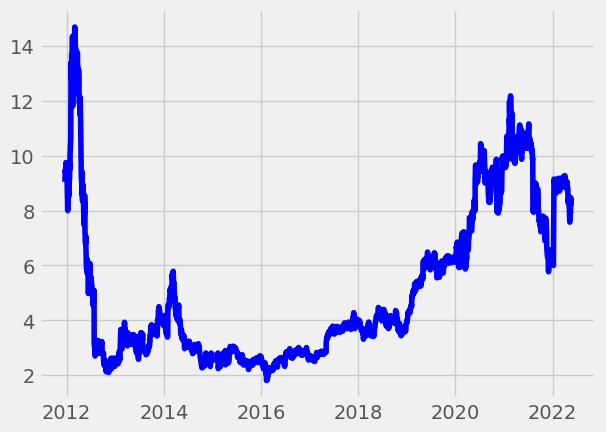

In [7]:
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


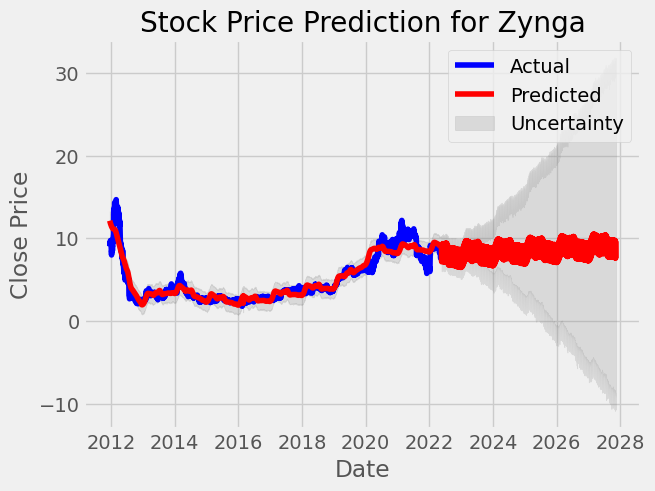

In [8]:

plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')


plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Zynga')
plt.legend()
plt.show()